# Multiclass Classification

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = os.path.join("./", 'train')
validation_dir = os.path.join("./", 'validation')

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255) #(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) #(rescale=1./255) # Generator for our validation data

# Image Exploration Analysis

In [4]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           shuffle=True)
train_data_gen.target_size

Found 4113 images belonging to 50 classes.


(256, 256)

In [5]:
print(
f"Total number of images in training batch : {train_data_gen.total_batches_seen} \n"
f"Batch size : {train_data_gen.batch_size} \n"
f"Class indices: {train_data_gen.class_indices} \n"
f"Image shape: {train_data_gen.image_shape} \n"    
)

Total number of images in training batch : 0 
Batch size : 32 
Class indices: {'101_organicgingerroot': 0, '1body_adrenalsupport': 1, 'activeedge_cherry': 2, 'bioglan_beautyprotein': 3, 'bioglan_calamarigold': 4, 'bioglan_flaxchia': 5, 'bioglan_tumeric': 6, 'brainzyme_focuselite': 7, 'centrumadvance_multivitamin': 8, 'cosmicmolecule_bonebroth': 9, 'dietapplements_applecidervinegar': 10, 'eastmeetswest_curcumin': 11, 'forestfungi_6mushroomcomplex': 12, 'grassfed_bonebrotheroriginal': 13, 'grassfedbeef_bonebroth': 14, 'holland&barret_jointcare': 15, 'holland&barret_selenium': 16, 'holland&barrett_calciummagnesiumvitd': 17, 'hunter&gather_heart': 18, 'hunter&gather_heartliver': 19, 'hunter&gather_liver': 20, 'ketosource_purec8mctoil': 21, 'lindtt_99darkchocolate': 22, 'montezuma_100absoluteblack': 23, 'naturesaid_sleepeezy': 24, 'naturesaid_valerian': 25, 'naturya_acai': 26, 'newnordic_clearbrain': 27, 'nutravita_bioculture': 28, 'nutravita_psylliumhuskfibre': 29, 'nutravita_tumeric': 30,

In [6]:
# Show possible parameters that can be set for "class_mode" parameter
train_data_gen.allowed_class_modes

{None, 'binary', 'categorical', 'input', 'sparse'}

# Model Data Preparation

In [7]:
batch_size = 32
epochs = 50
# make images smaller to increase training speed
IMG_HEIGHT = 100 
IMG_WIDTH = 100

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 4113 images belonging to 50 classes.
Found 1026 images belonging to 50 classes.


In [9]:
total_train = train_data_gen.samples
total_val = val_data_gen.samples

# Image Exploration Analysis Pt. 2

In [10]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, number_images):
    fig, axes = plt.subplots(1, number_images, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

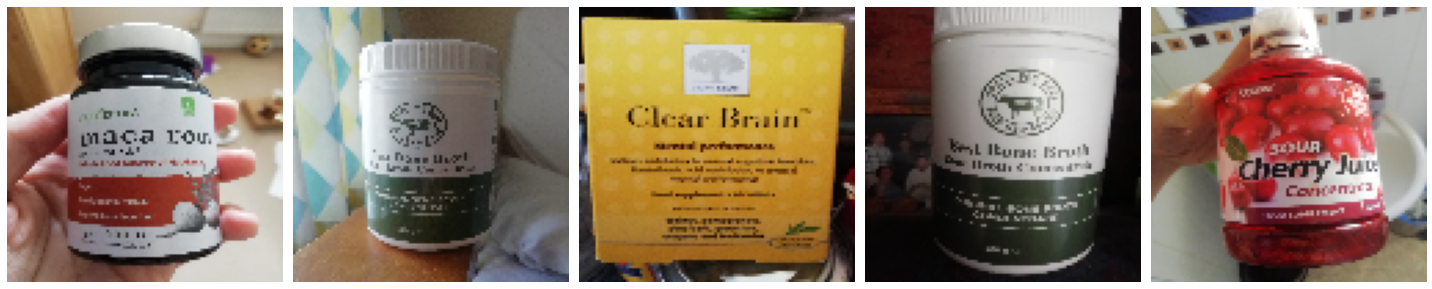

In [11]:
plotImages(sample_training_images, 5) # note that batch size was set to 3.

# Create Convultional-Neural-Net and Train

In [18]:
NumberOfClasses = 50 # <----- MANUAL CHANGE REQUIRED!!!
model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2 ,2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NumberOfClasses, activation='softmax') # sigmoid for binary classifcation
    #Dense(1, activation='sigmoid')  # USE FOR BINARY CLASSIFICATION
])

In [19]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy', #tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [32]:
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs['accuracy'] > 0.95):  # acc
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True 
callback = myCallback()

In [30]:
import timeit


In [ ]:
# Running model.fit_generator again in the same cell
# ... seems to have kept the accuracy from the previous run
# ... even though we changed the callback parameters in fit_generator 

In [33]:
start_time = timeit.default_timer()
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[callback]
)
elapsed = timeit.default_timer() - start_time

Epoch 1/50
128/128 [==============================] - 1000s 8s/step - loss: 0.5284 - accuracy: 0.8535 - val_loss: 0.5196 - val_accuracy: 0.8594
Epoch 2/50
128/128 [==============================] - 1038s 8s/step - loss: 0.2061 - accuracy: 0.9405 - val_loss: 0.3965 - val_accuracy: 0.8936
Epoch 3/50
128/128 [==============================] - 966s 8s/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.3127 - val_accuracy: 0.9180
Reached 95% accuracy so cancelling training!


In [34]:
elapsed

3009.8587217210006

In [35]:
current_dir = os.getcwd()

In [38]:
out_path = current_dir + "/model2"

In [39]:
model.save(out_path)

INFO:tensorflow:Assets written to: /Users/williamtun/Documents/DataProjects/2020_ML/SupplementsComputerVisionProject/model2/assets


Text(0.5, 1.0, 'Training and validation loss')

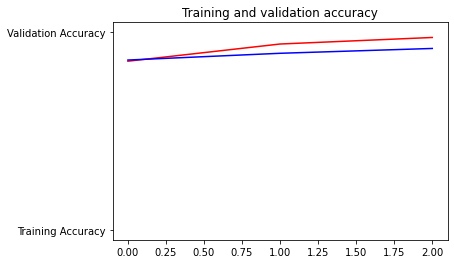

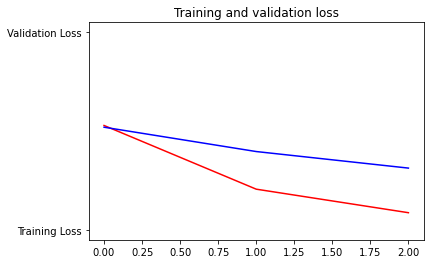

In [41]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy'] #acc
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

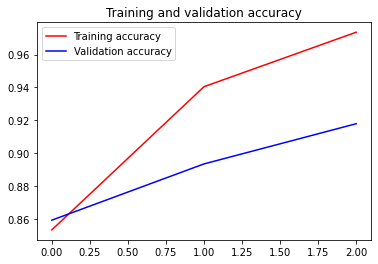

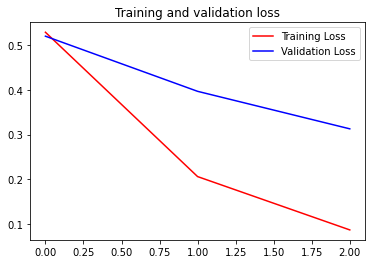

In [42]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()